In [16]:
import pandas as pd
import DataComp as dc
from scipy.stats import ttest_ind as ttest

In [4]:
dfs, df_names = dc.get_data(["/home/colin/git/DataComp/niklas_test.csv"], groupby="DD01",
                         rel_cols=["IM01_01", "IM01_02", "IM01_03", "IM01_04", "IM01_05"])

In [19]:
df = pd.read_csv("/home/colin/git/DataComp/niklas_test.csv", index_col=0)[["IM01_01", "IM01_02", "IM01_03", "IM01_04", "IM01_05"]]

In [34]:
x = "IM01_01	IM01_02	IM01_03	IM01_04	IM01_05	UK01_01	UK01_02	UK01_03	UK01_04	UK01_05	LT01_01	LT01_02	LT01_03	LT01_04	LT01_05	SZ01_01	SZ01_02	SZ01_03	SZ01_04	SZ01_05	KP01_01	KP01_02	KP01_03	KP01_04	KP01_05"
feats = x.split("\t")

'IM01_01'

In [36]:
df = pd.read_csv("/home/colin/git/DataComp/niklas_test.csv", index_col=0)

x = "IM01_01	IM01_02	IM01_03	IM01_04	IM01_05	UK01_01	UK01_02	UK01_03	UK01_04	UK01_05	LT01_01	LT01_02	LT01_03	LT01_04	LT01_05	SZ01_01	SZ01_02	SZ01_03	SZ01_04	SZ01_05	KP01_01	KP01_02	KP01_03	KP01_04	KP01_05"
feats = x.split("\t")
results = dict()

for feat1 in feats:
    results[feat1] = dict()
    
    for feat2 in feats:
        results[feat1][feat2] = ttest(df[feat1], df[feat2]).pvalue

In [41]:
res = pd.DataFrame(results)
sig = res < 0.05
sig.sum(axis=1)

IM01_01    19
IM01_02    18
IM01_03    18
IM01_04    23
IM01_05    17
KP01_01    17
KP01_02    18
KP01_03    17
KP01_04    16
KP01_05    20
LT01_01    19
LT01_02    15
LT01_03    15
LT01_04    19
LT01_05    17
SZ01_01    18
SZ01_02    24
SZ01_03    22
SZ01_04    21
SZ01_05    19
UK01_01    23
UK01_02    21
UK01_03    20
UK01_04    17
UK01_05    21
dtype: int64

In [9]:
l = pd.Series()
for col in ["IM01_01", "IM01_02", "IM01_03", "IM01_04", "IM01_05"]:
    l = l.append(df[col])

In [11]:
l.mean()

3.8319634703196348

In [12]:
pd.Series([3.19, 4.18, 3.73, 4.56, 3.89]).mean()

3.9100000000000001

In [7]:
zipper = create_zipper(dfs)

In [8]:
p = test_num_dist(zipper)

# CHECK IF THE FOLLOWING TABLE KEEPS THE ORDER LIKE IN THE DICT. -> CHECK IF VALUES ARE LISTED IN THE RIGHT KEY/INDEX COMBINATIONS

In [9]:
x = p_correction(p)
x

pv    cor_pv  signf
IM01_01 (0, 1)  0.938650  0.994593  False
        (0, 2)  0.339447  0.963754  False
        (1, 2)  0.411305  0.975496  False
IM01_02 (0, 1)  0.087461  0.716240  False
        (0, 2)  0.086044  0.716240  False
        (1, 2)  0.107786  0.745536  False
IM01_03 (0, 1)  0.728831  0.994593  False
        (0, 2)  0.790193  0.994593  False
        (1, 2)  0.876214  0.994593  False
IM01_04 (0, 1)  0.026940  0.336115  False
        (0, 2)  0.550809  0.981713  False
        (1, 2)  0.422578  0.975496  False
IM01_05 (0, 1)  0.282033  0.949308  False
        (0, 2)  0.157729  0.848655  False
        (1, 2)  0.164203  0.848655  False

# Plot significant deviances

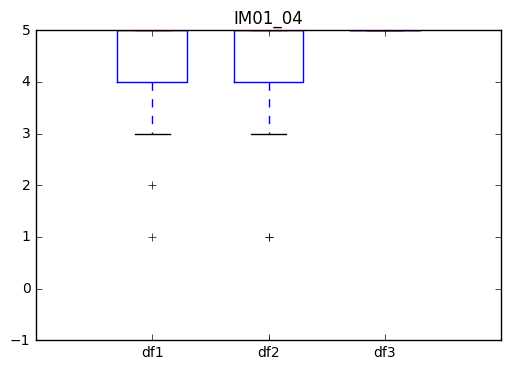

In [14]:
def plot_sig_feats(df, zipper, df_names, feats=None, save_folder=None):
    """ """
    
    # grab significant deviances
    sig_entries = df[df["signf"]]
    index_labels = sig_entries.index.labels[0]
    sig_feats = set(itemgetter(index_labels)(sig_entries.index.levels[0]))
    
    sig_zipper = {x:zipper[x] for x in sig_feats}
    single_feature_bp(sig_zipper, df_names, feats=None, save_folder=None)

plot_sig_feats(x, zipper, df_names, feats=None, save_folder=None)